# Introduction

Foutz, T. J., Arlow, R. L., & McIntyre, C. C. (2012). Theoretical principles underlying optical stimulation of a channelrhodopsin-2 positive pyramidal neuron. Journal of Neurophysiology, 107(12), 3235–3245. doi:10.1152/jn.00501.2011

This folder contains the core source files used to generate the data and figures in the manuscript. The below example script is an ipython notebook file which can be used to generate Figure 2.

# Dependencies

These files were run on Mac OS 10.9 using Python 2.7.6 64-bit installed using Canopy 1.3. Canopy is a package from Enthought, who provides free licenses to academic users, and it includes all the dependencies other than NEURON (Mayavi, Matplotlib, numpy). NEURON was installed as a python library using the following installation bash script:
    
    sudo mkdir /nrn
    sudo chown $USER:staff /nrn
    cd /nrn
    hg clone http://www.neuron.yale.edu/hg/neuron/iv
    hg clone http://www.neuron.yale.edu/hg/neuron/nrn
    cd /nrn/iv
    ./build.sh
    ./configure --prefix=/nrn CFLAGS='-arch x86_64' CXXFLAGS='-arch x86_64'
    make
    make install
    make clean
    cd /nrn
    cd /nrn/nrn
    make clean
    ./build.sh
    ./configure --prefix=/nrn --with-iv=/nrn PYLIBLINK='-framework Python' PYLIB='-framework Python' --with-nrnpython=dynamic CC='clang' CXX='clang++' CFLAGS='-O3 -Wno-return-type -Wno-implicit-function-declaration -Wno-implicit-int' CXXFLAGS='-O3 -Wno-return-type -Wno-implicit-function-declaration -Wno-implicit-int'
    make
    sudo make install
    make clean
    cd /nrn/nrn/src/nrnpython
    python setup.py install

# Abstract

Theoretical principles un- derlying optical stimulation of a channelrhodopsin-2 positive pyrami- dal neuron. J Neurophysiol 107: 3235–3245, 2012. First published March 21, 2012; doi:10.1152/jn.00501.2011.—Optogenetics is an emerging field of neuromodulation that permits scaled, millisecond temporal control of the membrane dynamics of genetically targeted cells using light. Optogenetic technology has revolutionized neuro- science research; however, numerous biophysical questions remain on the optical and neuronal factors impacting the modulation of neural activity with photon-sensitive ion channels. To begin to address such questions, we developed a computational tool to explore the under- lying principles of optogenetic neural stimulation. This “light-neuron” model consists of theoretical representations of the light dynamics generated by a fiber optic in brain tissue, coupled to a multicompart- ment cable model of a cortical pyramidal neuron embedded with channelrhodopsin-2 (ChR2) membrane dynamics. Simulations re- vealed that the large energies required to generate an action potential are primarily due to the limited conductivity of ChR2, and that the major determinants of stimulation threshold are the surface area of illuminated cell membrane and proximity to the light source. Our results predict that the activation threshold is sensitive to many of the properties of ChR2 (density, conductivity, and kinetics), tissue me- dium (scattering and absorbance), and the fiber-optic light source (diameter and numerical aperture). We also illustrate the impact of redistributing the ChR2 expression density (uniform vs. nonuniform) on the activation threshold. The model system developed in this study represents a scientific instrument to characterize the effects of opto- genetic neuromodulation, as well as an engineering design tool to help guide future development of optogenetic technology.

# Import NEURON library

In [1]:
from neuron import h
h.load_file("stdrun.hoc")
h.cvode_active(1)

1.0

# Instantiate cell, stimulator and simulation classes

Cell model is taken from *Distinct contributions of Na(v)1.6 and Na(v)12 in action potential initiation and backpropagation*, Hu *et al.*, Nat Neurosci (2009). For details regarding the cell and optical fiber models, see source code and manuscript.

In [2]:
from classes import Hu, Optrode, Sim
cell = Hu()
optrode = Optrode(h.soma)
sim = Sim(cell,optrode,output_filename='csv/distance_threshold.csv')

	1 
	1 
	1 
	1 


# Run simulation

This example recreates the data for Figure 2c in the manuscript. It determines the threhold for generating an action potential at a range of distances from the cell body, and for a range of fiber diameters. It takes about XXX minutes on my macbook pro laptop. The output is already in the csv folder. Uncomment this section if you desire to regenerate the results on your hardwar, or to adjust the parameters.

In [3]:
#distances=xrange(100, 2000 + 50, 50)
#fiber_diameters = [0.1,0.2,0.4]
#params   = [{'Distance (um)':d,
#             'Fiber Optic Diameter (mm)':f} 
#            for d in distances 
#            for f in fiber_diameters]
#sim.main(params)

# Plot results

iPython notebooks can plot matplotlib inline if desired using the following *magic* command

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Use matplotlib to display the distance versus threshold results.

(0.0, 2000.0)

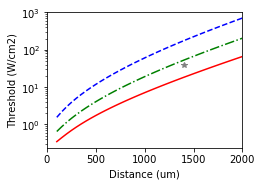

In [5]:
from matplotlib import pyplot
from classes import Data
from functions import make_legend

# Simulation
ds = Data('csv/distance_threshold.orig.csv')
# ds = Data('csv/distance_threshold.csv') # Use this filename if you ran your own simulations
ds.sort('Distance (um)')

# Strength-Distance
fig = pyplot.figure(figsize=(3.5,2.5))
styles = iter(['b--','g-.','r'])
for f in [0.1,0.2,0.4]:
    ds.set_slice(ds.data['Fiber Optic Diameter (mm)']==f)
    pyplot.semilogy(ds.slice['Distance (um)'],ds.slice['Threshold (W/cm2)'],
                    next(styles),
                    label='%.1f' % f)
pyplot.plot([1400], [38.0], '*', color='0.5',label='Aravanis (0.2)') # Aravanis data point
pyplot.xlabel('Distance (um)')
pyplot.ylabel('Threshold (W/cm2)')
pyplot.xlim([0,2000])

# Visualize Simulation Rig

2D visualization of the neuron geometry can be done in matplotlib using the cell's *plot* method. The *plot* method generates the cell's trajectory with a color overlay determined by an arbitrary input function that is run for each NEURON section. In this example, the input function returns the section's intracellular voltage.

----------------------------------------------------------------------------------------------------
DATA RANGE:  -74.32592018626336 -70.0808863931791


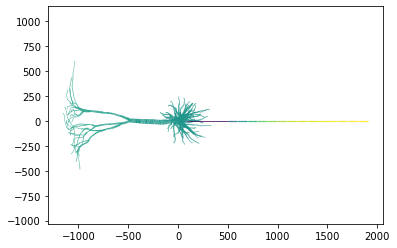

In [6]:
from matplotlib import pyplot
plot_func = lambda sec:sec.v
h.run()
cell.plot(plot_func)
pyplot.show()

3D visualization of the neuron geometry requires Mayavi, a 3d visualization library based on VTK. It is done with a *display* method. Again, the color is determined by an arbitary function run on each NEURON section (here I use the same function as above). The optical fiber can also be represented using a *display* method.

In [ ]:
cell.display(plot_func)
optrode.display(bounds=[[-1000,1000],[-1000,1000],[0,2000]])

----------------------------------------------------------------------------------------------------


# Move Neuron

To move the neuron in space, just use the *move* method. Here we move by 50 um along each axis. Here we stop the simulation during the light pulse at time 4 ms so that we can plot the irradiance of the section.

In [ ]:
from mayavi import mlab
mlab.figure()
cell.move([50,50,50])
h.tstop = 4
h.run()
plot_func = lambda sec:sec.irradiance_chanrhod
cell.display(plot_func)
optrode.display(bounds=[[-1000,1000],[-1000,1000],[0,2000]])

# Further Questions

Please see the source code and manuscript for more information regarding the model and simulation design. Feel free to contact the authors if additional code resources are needed.

-- Tom Foutz (tfoutz@uw.edu) -- March 15, 2014 --